In [19]:
# install tidypython, if not already installed
#!pip install tidypython 

## import modeules
import pandas as pd
from sklearn.linear_model import LinearRegression
import plotnine as pn
import tidypython as tp
import dplython

# load data
df = pd.read_csv('/blue/zoo6927/share/Jupyter_Content/data/auto_mpg.csv')
df

,mpg,cyl,disp,hp,weight,accel,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


Use data visualization to determine the approximate (linear, quadratic, etc) relationship between variables:

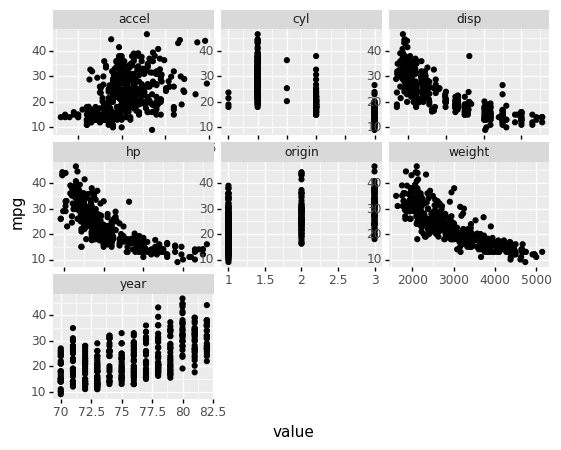

<ggplot: (2954278551447)>

In [20]:
newdf = df.drop('name', 1)
newdf = pd.melt(newdf,id_vars="mpg")

(pn.ggplot(data = newdf, 
           mapping = pn.aes(x = 'value', y = 'mpg')) 
     +  pn.geom_point() 
     +  pn.facet_wrap('variable', scales="free"))



We see that the relationship is approximately quadratic for disp, hp, and weight.  It is approximately linear for the other variables (although, of course, this is just from eye-balling it and we could be convinced otherwise). 

Add columns to the dataframe for  disp^2, hp^2, weight^2 and define x and y variables.

In [11]:
df['disp_sq'] = df.disp**2
df['weight_sq'] = df.weight**2
df['hp_sq'] = df.hp**2

y = df[['mpg']]
x = df[['cyl', 'disp_sq', 'hp_sq', 'year','origin']]


Run the linear regression model and check for R^2

In [13]:
newmodel = LinearRegression().fit(x,y)
newmodel.score(x,y)  # we see this is improved over the model we used in class

0.7481042181452062